# Préparation de la base de données #

On importe les packages qui seront nécessaires pour notre analyse de données. 

In [42]:
!pip install pathlib2
!pip install python-Levenshtein
!pip install openpyxl
!pip install --upgrade xlrd
!pip install pandas fiona shapely pyproj rtree
!pip install pyreadr

import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pyreadr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

## Préparation Préliminaire sur R ##

In [ ]:
#Code sur R pour convertir les parties de la base de données qui nous intéressait en fichier csv
"""
#Spécification du chemin

chemin_csv <- "W:/Documents/3A/SocioQ/movie.csv"

# Exporter la base de données en format CSV
write.csv(movies, file = chemin_csv, row.names = FALSE)
"""

## Importation sur Python et création de la base de données d'intérêt ##

On importe la base de donnée qui nous intéresse. Il s'agit de celle convertie précédemment.

In [13]:
encodage = 'latin-1'
movie = pd.read_csv('movie.csv',encoding=encodage,sep=',')
movie

/tmp/ipykernel_257/2493774295.py:2: DtypeWarning: Columns (24,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  movie = pd.read_csv('movie.csv',encoding=encodage,sep=',')


,url,id,note_Presse,note_Spectateurs,synopsis,infos,Nationalité,Distributeur,Année de production,Date de sortie DVD,...,Format audio,Format de projection,N° de Visa,Récompenses,Nationalités,Date de reprise,Récompense,Remake de,Spin-off de,Inspiré de
0,https://www.allocine.fr/film/fichefilm_gen_cfi...,304685,"4,0","3,9","Dans les années 30 à Paris, Madeleine Verdier,...",8 mars 2023\r\n\r\n\r\nen salle\r\n\r\n/\r\n1h...,France,Gaumont Distribution,2023.0,-,...,-,-,156966,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.allocine.fr/film/fichefilm_gen_cfi...,255726,"4,9","4,3",Portrait profondément intime dune enfance amé...,22 février 2023\r\n\r\n\r\nen salle\r\n\r\n/\r...,U.S.A.,Universal Pictures International France,2022.0,-,...,-,-,-,2 prix et 11 nominations,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.allocine.fr/film/fichefilm_gen_cfi...,287538,"3,5","3,9",La vie toute tracée de Thelma prend un détour ...,15 mars 2023\r\n\r\n\r\nen salle\r\n\r\n/\r\n1...,France,SND,2023.0,-,...,-,-,151029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.allocine.fr/film/fichefilm_gen_cfi...,277129,"2,7","3,7","Idole de la boxe et entouré de sa famille, Ado...",1 mars 2023\r\n\r\n\r\nen salle\r\n\r\n/\r\n1h...,U.S.A.,Warner Bros. France,2023.0,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.allocine.fr/film/fichefilm_gen_cfi...,289056,"3,2","4,1","Charlie, professeur d'anglais reclus chez lui,...",8 mars 2023\r\n\r\n\r\nen salle\r\n\r\n/\r\n1h...,U.S.A.,ARP Sélection,2022.0,-,...,-,-,-,2 prix et 10 nominations,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102905,https://www.allocine.fr/film/fichefilm_gen_cfi...,261493,NaN,NaN,Les nouvelles aventures de la brigade de Reno.,Prochainement\r\n\r\n\r\n/\r\nComédie,U.S.A.,-,2018.0,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102906,https://www.allocine.fr/film/fichefilm_gen_cfi...,261515,NaN,NaN,Ikumi Sakurai est une jeune collégienne élevée...,Date de sortie inconnue\r\n/\r\n1h 08min\r\n/\...,Japon,-,2013.0,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102907,https://www.allocine.fr/film/fichefilm_gen_cfi...,313983,NaN,NaN,"Ella s'inscrit à un test clinique destiné à ""r...","Date de sortie inconnue\r\n/\r\nThriller,\r\nE...",U.S.A.,-,2023.0,-,...,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102908,https://www.allocine.fr/film/fichefilm_gen_cfi...,314869,NaN,NaN,NaN,Prochainement\r\n\r\n\r\n/\r\nEpouvante-horreur,NaN,-,2024.0,-,...,-,-,-,NaN,"U.S.A.,\r\n Japon",NaN,NaN,NaN,NaN,NaN


On va supprimer les colonnes pas intéressantes dans le cadre de notre analyse pour faciliter l'implémentation. 

In [57]:
df = movie[['url', 'id', 'note_Presse', 'note_Spectateurs','Distributeur','Budget','Langues', 'Récompense']]
df

,url,id,note_Presse,note_Spectateurs,Distributeur,Budget,Langues,Récompense
0,https://www.allocine.fr/film/fichefilm_gen_cfi...,304685,"4,0","3,9",Gaumont Distribution,-,Français,NaN
1,https://www.allocine.fr/film/fichefilm_gen_cfi...,255726,"4,9","4,3",Universal Pictures International France,-,Anglais,NaN
2,https://www.allocine.fr/film/fichefilm_gen_cfi...,287538,"3,5","3,9",SND,-,Français,NaN
3,https://www.allocine.fr/film/fichefilm_gen_cfi...,277129,"2,7","3,7",Warner Bros. France,-,Anglais,NaN
4,https://www.allocine.fr/film/fichefilm_gen_cfi...,289056,"3,2","4,1",ARP Sélection,-,Anglais,NaN
...,...,...,...,...,...,...,...,...
102905,https://www.allocine.fr/film/fichefilm_gen_cfi...,261493,NaN,NaN,-,-,Anglais,NaN
102906,https://www.allocine.fr/film/fichefilm_gen_cfi...,261515,NaN,NaN,-,-,Japonais,NaN
102907,https://www.allocine.fr/film/fichefilm_gen_cfi...,313983,NaN,NaN,-,-,Anglais,NaN
102908,https://www.allocine.fr/film/fichefilm_gen_cfi...,314869,NaN,NaN,-,-,Anglais,NaN


In [58]:
# Remplacer '--' par NaN et remplacer les virgules par des points dans les colonnes 'note_Presse' et 'note_Spectateurs'
df['note_Presse'] = pd.to_numeric(df['note_Presse'].replace('--', pd.NA).str.replace(',', '.'), errors='coerce')
df['note_Spectateurs'] = pd.to_numeric(df['note_Spectateurs'].replace('--', pd.NA).str.replace(',', '.'), errors='coerce')

/tmp/ipykernel_257/338836235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['note_Presse'] = pd.to_numeric(df['note_Presse'].replace('--', pd.NA).str.replace(',', '.'), errors='coerce')
/tmp/ipykernel_257/338836235.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['note_Spectateurs'] = pd.to_numeric(df['note_Spectateurs'].replace('--', pd.NA).str.replace(',', '.'), errors='coerce')


In [65]:
df_sans_nan = df.dropna(subset=['note_Presse', 'note_Spectateurs']) #On vire les NaN pour computer la régression

Mean Squared Error : 0.307503006633836
R-squared : 0.3332973589756071


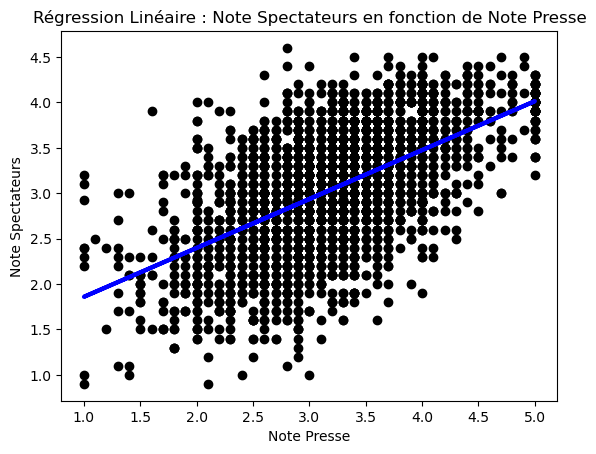

In [67]:
# Sélectionner les colonnes de notes pour la régression linéaire
X = df_sans_nan[['note_Presse']]
y = df_sans_nan['note_Spectateurs']

# Diviser les données en ensembles d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputer pour remplacer les NaN par la moyenne dans les données d'entraînement et de test
imputer_X = SimpleImputer(strategy='mean')
X_train_imputed = imputer_X.fit_transform(X_train)
X_test_imputed = imputer_X.transform(X_test)

# Créer un modèle de régression linéaire
modele_reg_lineaire = LinearRegression()

# Entraîner le modèle avec les données d'entraînement imputées
modele_reg_lineaire.fit(X_train_imputed, y_train)

# Effectuer des prédictions sur les données de test
predictions = modele_reg_lineaire.predict(X_test_imputed)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error : {mse}')
print(f'R-squared : {r2}')

# Tracer la régression linéaire
plt.scatter(X_test, y_test, color='black')  # Utilisez X_test plutôt que X_test_imputed
plt.plot(X_test, predictions, color='blue', linewidth=3)
plt.xlabel('Note Presse')
plt.ylabel('Note Spectateurs')
plt.title('Régression Linéaire : Note Spectateurs en fonction de Note Presse')
plt.show()

In [69]:
df_rec_sans_nan = df.dropna(subset=['Récompense'])
df_rec_sans_nan 

,url,id,note_Presse,note_Spectateurs,Distributeur,Budget,Langues,Récompense
14,https://www.allocine.fr/film/fichefilm_gen_cfi...,295067,3.6,4.000000,Warner Bros. France,-,Français,1 nomination
16,https://www.allocine.fr/film/fichefilm_gen_cfi...,281261,3.0,4.000000,StudioCanal,-,Français,1 nomination
17,https://www.allocine.fr/film/fichefilm_gen_cfi...,294679,3.6,3.800000,The Jokers / Les Bookmakers,-,Français,1 nomination
27,https://www.allocine.fr/film/fichefilm_gen_cfi...,289237,3.8,3.200000,Diaphana Distribution,-,Français,1 nomination
35,https://www.allocine.fr/film/fichefilm_gen_cfi...,258503,3.1,4.100000,KMBO,"2,1 M",Français,1 nomination
...,...,...,...,...,...,...,...,...
102855,https://www.allocine.fr/film/fichefilm_gen_cfi...,257655,NaN,2.923296,-,-,Portugais,1 nomination
102881,https://www.allocine.fr/film/fichefilm_gen_cfi...,259509,NaN,2.923296,-,-,Coréen,1 nomination
102882,https://www.allocine.fr/film/fichefilm_gen_cfi...,259514,NaN,2.923296,-,-,Coréen,1 nomination
102883,https://www.allocine.fr/film/fichefilm_gen_cfi...,259515,NaN,2.923296,-,-,Coréen,1 nomination
